In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install fastbook


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 33.7 MB/s eta 0:00:00


In [3]:
import fastbook
fastbook.setup_book()

In [4]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [5]:
#MNIST prediction

#for this initial tutorial we are just hoing to try create a model that can classify any image
#as a 3 or a 7. So lets download a sample of MNIST that contains images of just these digits:


path = untar_data(URLs.MNIST_SAMPLE)

In [6]:
Path.BASE_PATH = path

In [7]:
# we can see what in this directory by using ls a method added by fastai

path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [8]:
#The MNIST dataset follows a common layout for machine learning datasets:
#separate folders for the training set and the validation set
#Lets check the training set

In [9]:

(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [10]:
#There is a folder of 3s, and a folder of 7s. In machine learning parlance, we say that
#3 and 7 are the labels in this dataset. Lets take a look in one of these folders

#We use sorted here to ensure we all get the same order of files


threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [11]:
#Clearly we cna see that its full of image files
# Lets take a look at one now


im3_path = threes[1]
im3 = Image.open(im3_path)
im3

Here we are using the Image class from the PIL, which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.


In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor. For instance,heres what a section of the image look like, converted to a NumPy array:

In [12]:
array(im3)[4:, 4:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0,

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
device

device(type='cuda')

In [22]:
tensor(im3).to(device)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [23]:
#We can slice the array to pick just the part with the top of the digit in it, and
#then use a Pandas DataFrame to color-code the values using a gradient, which shows us
#clearly how the image is created from the pixel values:


im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greens')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [25]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]


len(three_tensors), len(seven_tensors)

(6131, 6265)

<AxesSubplot:>

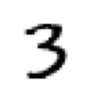

In [26]:
#We also check that one of the images looks okay. Since we now have tensors

show_image(three_tensors[1])

In [19]:
'''For every pixel position we want to compute the average over all the images o the intensity
of that pixel. To do this we first combine all the images in this list into a single three-dimesional tensor
The most common way to describe usch a tensor is to call it a rank-3 tensor. We often need to 
stack up individual tensors in a collection into a single tensor
Unsurprisingly PyTorch comes with a function called stack that we can use for this purpose

Some operations in PyTorch such as taking a mean require us to cast our integer types to float types.
Since we'll be needing this later, we'll also cast our stacked tensor to float now. Casting in PyTorch is as simple as typing the name of 
the type you wish to cast to and treating it as a method'''

"For every pixel position we want to compute the average over all the images o the intensity\nof that pixel. To do this we first combine all the images in this list into a single three-dimesional tensor\nThe most common way to describe usch a tensor is to call it a rank-3 tensor. We often need to \nstack up individual tensors in a collection into a single tensor\nUnsurprisingly PyTorch comes with a function called stack that we can use for this purpose\n\nSome operations in PyTorch such as taking a mean require us to cast our integer types to float types.\nSince we'll be needing this later, we'll also cast our stacked tensor to float now. Casting in PyTorch is as simple as typing the name of \nthe type you wish to cast to and treating it as a method"

In [27]:
#Generally when images are floats, the pixel values are expected to be between 0 and 1,
# so we will also divide by 255 here:

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

stacked_sevens.to(device)
stacked_threes.to(device)

stacked_threes.shape

torch.Size([6131, 28, 28])

<AxesSubplot:>

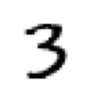

In [28]:
show_image(stacked_threes[1])

Perhaps the most important attribute of a tensor is its shape. This tells you the length of each axis. In this case we can see that we have 6131 images, each of size 28x28 pixels. There is nothing specifically about this tensor that says that the first axis is the number of images, the second is the height, and the third is the width- the semantics of a tensor are entirely up to us and how we construct it. As far as PyTorch is concerned it is just a bunch of numbers in memory



In [22]:
#The length of a tensor's shape is its rank:
len(stacked_threes.shape)

3

Imp: Rank is the number of axes or dimensions of a tensor
* shape is the size of each axis o a tensor

<AxesSubplot:>

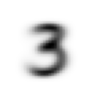

In [29]:
mean3 = stacked_threes.mean(0)
show_image(mean3)


#according to this dataset, this is the ideal number 3. You can see how its very dark where
# all the images agree it should be dark

<AxesSubplot:>

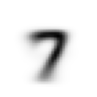

In [30]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<AxesSubplot:>

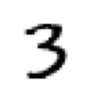

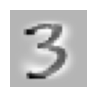

In [31]:
a_3 = stacked_threes[1]
show_image(a_3)

#The mean/blurry 3 is considered ideal representation of 3, however that might be wrong
#in our eyes

#So lets plot the difference

show_image(a_3 - mean3)  #showing the simple difference

In [32]:
dist_3_abs = (a_3 - mean3).abs().mean()  #computing mean absolute difference or L1 norm
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

#In both cases, the distance between out 3 and the ideal 3 is less than the distance to the ideal 7.
#So our simple model will give the right prediction in this case.


(tensor(0.1114), tensor(0.2021))

In [33]:
#import torch.nn.Functional as F is available by default under that name in fastai

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [34]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

In [35]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
arr+1

array([[2, 3, 4],
       [5, 6, 7]])

In [37]:
tns.type()

'torch.LongTensor'

In [38]:
#Since mnist provides a separate validation dataset
#We will build validation datasets out of them and store them in separate boxes

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()]).float()/255 #For Nomalizing
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]).float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [39]:
def mnist_distance(a,b):
    return (a-b).abs().mean((-1,-2))

#Here we use -1,-2 because that refers to the last and the second last element, in this case
#This tells pytorch to calculate mean over the last two axis

mnist_distance(a_3, mean3)

tensor(0.1114)

The above output just caculates l1 norm between the ideal sample and the arbitrary sample. However in order to calculate the l1  norms for all the samples in the dataset, we can use the BROADCASTing property of the tensor/array

In [40]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1270, 0.1632, 0.1676,  ..., 0.1228, 0.1210, 0.1287]),
 torch.Size([1010]))

In [41]:
#Now check whether a number is 3
# to do this we compare the distance between sample 3 and the ideal 3
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [42]:
is_3(a_3), is_3(a_3).float()


(tensor(True), tensor(1.))

Note that when we convert the boolean response to a float we get 1.0 for True and 0.0 for False. Thanks to broadcasting we can also test it on the full validation set of 3s

In [43]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()


accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [44]:
#We are only classifying 2 out of the 10 possible digits so far. 
#So we are going to need to do better


#To do better, perhaps it is time to try a system that does some real learning
#that is that can automatically modify itself to improve its performance
#In other words, its time to talk about the training process, and SGD.




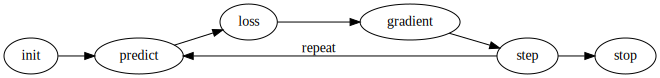

In [45]:
'''steps involved'''

#id gradient_descent
#caption the gradient descent process
#alt graph showing the steps for gradient descent


gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

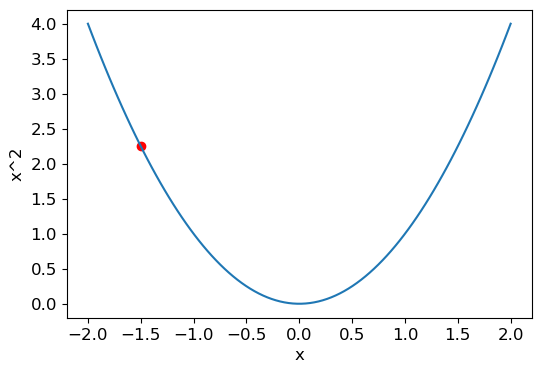

In [46]:
#take a simpler case

def f(x):
    return x**2
    
plot_function(f, 'x', 'x^2')
plt.scatter(-1.5, f(-1.5), color='red')

In [47]:
#Lets first pick a tensor value which we want gradients at

xt = tensor(3.).requires_grad_()

In [48]:
#now we calculate our function with that value. Notice how Pytorch prints not just the value
#calculated but also a not that it has a gradient functionit will be using to calculate our gradients when needed


yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [49]:
#Finally we tell pytorch to calculate the gradients for us
yt.backward()

In [50]:
xt.grad

tensor(6.)

Derivative of $x^2$ is $2x$ hence value of the derivative of yt is 6 ie $2x3$

In [51]:
#lets check with a tensor

xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [52]:
#And we will add sum to our function so it can take a vecor and return a scalar

def f(x):
    return(x**2).sum()


yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [53]:
yt.backward()
xt.grad



tensor([ 6.,  8., 20.])

The gradients only tell us the slope of out function, they dont actually twll us exactly how far to adjust the parameters

In [54]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

Stepping With a Learning Rate

In [55]:
#An end to end sgd example

In [57]:
#Generate time scale(ie over 20 seconds scale)


time = torch.arange(0,20).float().to(device) ; time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.], device='cuda:0')

What we did here is we created speed as a dependent variable of time
* speed follows the time dependent function of a*(time**2) + (b*time) + c

* The torch.randn(20)*3 adds a certain amount of random noise to the function

In [80]:
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.], device='cuda:0')

(-0.9500000000000001, 19.95, -3.610338604450226, 71.4606658577919)

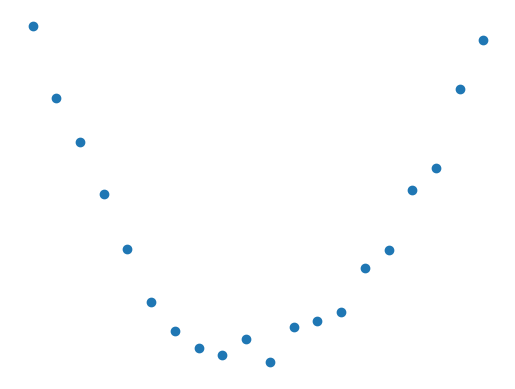

In [84]:
speed = torch.randn(20)*3 + 0.75*(time.to('cpu')-9.5)**2 + 1
plt.scatter(time.cpu(), speed.cpu())
plt.axis('off')



In [86]:
speed = speed.to(device)

In [87]:
#We want to distingush clearly betweenthe function's input and its parmeters.
# So lets collect the parameters in one argument and thus separate the input,t, and the parameters,

def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [88]:
#Also lets define a loss function

def mse(preds, targets):
    return ((preds - targets)**2).mean()

## Initialize the parameters

In [183]:
params = torch.randn(3)
params.requires_grad = True
#params = params.to(device)  #params are negative

In [184]:
params

tensor([-0.3286, -0.3712, -0.5473], requires_grad=True)

In [185]:
#save the original parameters
orig_params = params.clone()
orig_params

tensor([-0.3286, -0.3712, -0.5473], grad_fn=<CloneBackward0>)

## Calculate the predictions

In [188]:
preds = f(time, params)
preds = preds.to('cpu')

## Create a plot function to plot the predictions vs the function

In [189]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time.cpu(), speed.cpu())
    ax.scatter(time.cpu(), to_np(preds.cpu()), color='red')
    ax.axis('off')

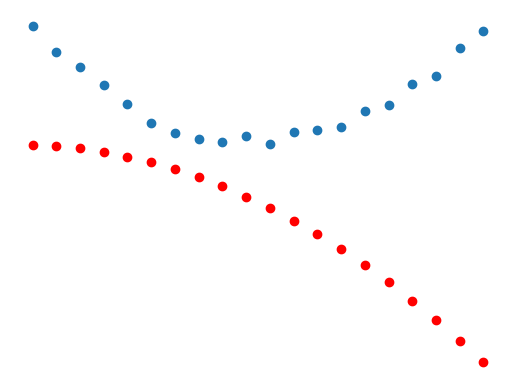

In [190]:
show_preds(preds)
#Not very good at prediction 

Initialize the loss function

In [191]:
#individual loss metrics

loss = [i for i in map(mse, speed,preds)]
loss_orig = loss.copy()

In [193]:
#calculating the loss
loss = mse(preds, speed.to('cpu'))
loss

tensor(7379.0674, grad_fn=<MeanBackward0>)

## Calculate the gradients

In [194]:
loss.backward()

In [195]:
params.is_leaf

True

In [196]:
params.grad

tensor([-27580.2676,  -1774.8252,   -140.3377])

In [198]:
params.grad * 1e-5 #we pick a learning rate of 1e-5

tensor([-0.2758, -0.0177, -0.0014])

In [199]:
params

tensor([-0.3286, -0.3712, -0.5473], requires_grad=True)

Step the weights

In [201]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [202]:
params  #hence the parameters are updated

tensor([-0.0528, -0.3535, -0.5459], requires_grad=True)

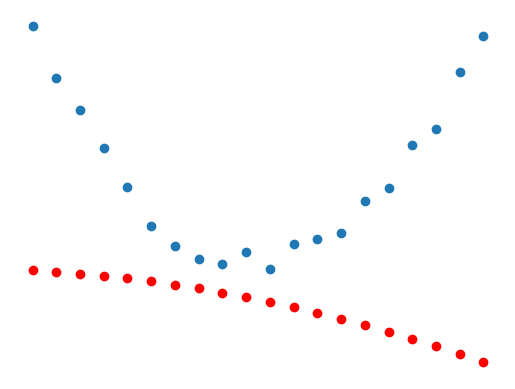

In [204]:
preds = f(time, params)
mse(preds, speed)

#loss has decreased significantly

show_preds(preds)

We need to repeat this a few times, so we will create a function to apply one step

In [205]:
def apply_step(params, prn=True):
    preds = f(time,params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= params.grad.data * 1e-5
    params.grad = None
    if prn: print(loss.item())
    return preds

Now repeat the process

In [216]:
for i in range(10):
    apply_step(params)

618.3956909179688
618.3917846679688
618.3880004882812
618.3841552734375
618.3803100585938
618.3764038085938
618.3726196289062
618.3688354492188
618.3649291992188
618.361083984375


To see how the loss goes down and the predition improves

In [222]:
params = orig_params.detach().requires_grad_()

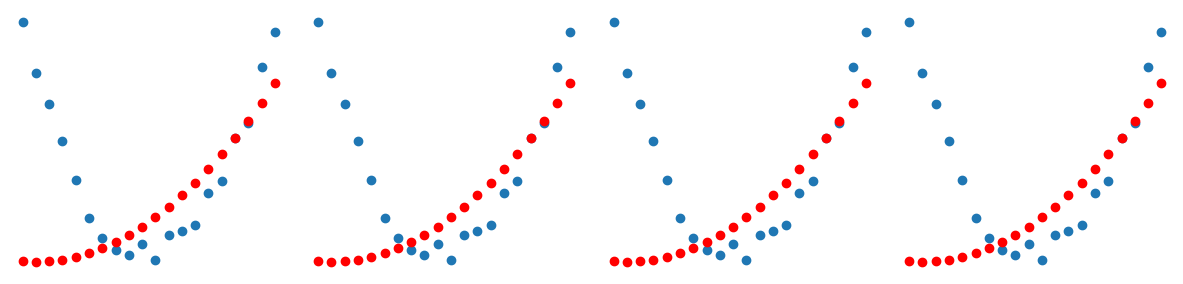

In [220]:
_, axs = plt.subplots(1,4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [225]:
#At first we will concatenate the tensors into one single tensor

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)


tensor(1242826.1250)

In [230]:
#We need label for each imge, we will use 1 for 3s and 0 for 7s

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape, train_y.shape

(torch.Size([12396, 1]), torch.Size([12396, 1]))

A Dataset in PyTorch is required to return a tuple of (x,y) when indexed. Python provides a zip function which, when combined with list, provides a simple way to get 
this functionality

In [231]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [238]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

Now we need an initial weight for every pixel 

In [239]:
def init_params(size, std=1.0):
    return (torch.randn(size)*std).requires_grad_()

In [240]:
weights = init_params((28*28,1))
#random weights initialized for each pixel

The function weights*pixels wont be flexible enough it always equal to 0 when the 
pixels are equal to 0. You might remember from high school math that the formula for a ine is y = w*x + b; we still need the b. We will initialize it to a random number too:


In [242]:
bias = init_params(1)
bias

tensor([-1.2717], requires_grad=True)

In [249]:
(train_x[0] * weights.T).sum() + bias
#Here we are transposing the weights because we need match the shape of both the vectors
#and hence create a set which is y ie = wx +b

torch.Size([784, 784])

In [253]:
def linear1(xb):
    return xb@weights + bias

preds = linear1(train_x)
preds

tensor([[11.8813],
        [ 2.1981],
        [10.1675],
        ...,
        [ 4.4300],
        [-2.9769],
        [ 2.7051]], grad_fn=<AddBackward0>)